Implement kernel regression form the paper "Just Interpolate: Kernel “Ridgeless” Regression Can Generalize".
The model is given by:
$f(x)=K(x,X)(K(X,X)+\lambda I)^{-1}Y$, where $K(x,y)$ is the Guassian kernel $K(x,y)=\exp(-\vert\vert x-y\vert\vert^2/d)$.
Some parameters: $\lambda=0$, sample size=10000/5000, $error=\frac{\sum_i (f(x_i)-y_i)^2}{\sum_i (\bar{y}-y_i)^2}$, $d=784$
We choose a pair of digits from MNIST dataset.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import EigenPro2.mnist as mnist
import math
import time

load MNIST dataset

In [31]:
(train_x, train_y), (test_x, test_y) = mnist.load()

print('X_train: ' + str(train_x.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_x.shape))
print('Y_test:  '  + str(test_y.shape))

Load MNIST dataset.
60000 train samples
10000 test samples
X_train: (60000, 784)
Y_train: (60000,)
X_test:  (10000, 784)
Y_test:  (10000,)


Note that we here only use the pair (2,6) to train our model. So we extract the data points which lable is 2 or 6. And relabeled as -1 and 1.
And choose different sizes of our training set. Here n=5000


In [32]:
X_temp=[]
X=[]
Y=[]
Y_temp=[]
for i in range(60000):
    if train_y[i] ==2:
        
        temp=train_x[i].flatten()
        temp2=-1
        X_temp.append(temp)
        Y_temp.append(temp2)
    elif train_y[i]==6:
        temp=train_x[i].flatten()
        temp2=1
        X_temp.append(temp)
        Y_temp.append(temp2)

print(len(Y_temp))
for i in range(5000):
    Y.append(Y_temp[i])
    X.append(X_temp[i])
print(len(Y))
index=pd.Index(Y)
index.value_counts()  
    

11876
5000


 1    2508
-1    2492
dtype: int64

Define the kernel function


In [33]:
def K(x,y):
    return math.exp(-(np.linalg.norm(x-y))**2/(784))
        
        

       

Construct the test set with only 2 and 5. Relabel as -1 and 1

In [34]:
X_test=[]
Y_test=[]
for i in range(10000):
    if test_y[i] ==2:
        
        temp=test_x[i].flatten()
        temp2=-1
        X_test.append(temp)
        Y_test.append(temp2)
    elif test_y[i] ==6:
        temp=test_x[i].flatten()
        temp2=1
        X_test.append(temp)
        Y_test.append(temp2)
print(len(X_test))

1990


In [35]:
def f(A,l):
    b=[]
    for a in A:
        row=[]
        for y in X:
            row.append(K(a,y))
        b.append(row)
    b=np.matrix(b) 
    I=np.identity(5000)
    k=[]
    for i in range(5000):
        row=[]
        for j in range(5000):
            row.append(K(X[i],X[j]))
    #Row=np.array(row)
        k.append(row)
    k=k+l*I
    
    k=np.matrix(k)
    k_inv=np.linalg.inv(k)
    y=np.array(Y)
    temp1=np.matmul(b,k_inv)
    temp2=np.matmul(temp1,y)
    return temp2
    

In [36]:
y_bar=np.average(Y_test)
print(y_bar)

-0.0371859296482412


In [37]:

z=[0, 0.01,0.02, 0.04, 0.08, 0.16, 0.32, 0.64, 1.28]
error=[]

time_start=time.time()
for l in z:
    num=0
    den=0
    print(l)
    te=[]
    y_pred1=f(X_test,l)
    y_pred2=np.ravel(y_pred1)
    
    for i in range(1990):
        if y_pred2[i]>0:
            temp=1
            te.append(temp)
        elif y_pred2[i]<0:
            temp=-1
            te.append(temp)
    for i in range(1990):
        num+=(te[i]-Y_test[i])**2
        den+=(y_bar-Y_test[i])**2
    error.append(num/den)
print(error)
#error=np.array(error)
#error=error.flatten

time_end=time.time()
time=time_end-time_start
print(time)

0
0.01
0.02
0.04
0.08
0.16
0.32
0.64
1.28
[0.01610266867343187, 0.01811550225761085, 0.022141169425968818, 0.026166836594326788, 0.04025667168357967, 0.05434650677283256, 0.05837217394119052, 0.06239784110954849, 0.0865518441196963]
1759.8850388526917


ValueError: x and y must have same first dimension, but have shapes (9,) and (1,)

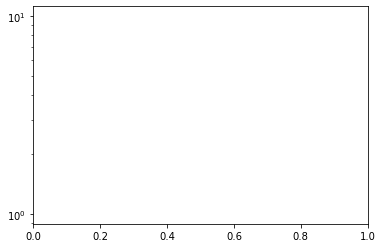

In [46]:
plt.semilogy(z,error)
plt.xlabel('lambda')
plt.ylabel('log(error)')
plt.show()

In [45]:
mis=[]
for i in range(1990):
    if Y_test[i]!=te[i]:
        mis.append(Y_test[i])
print(len(mis))
    

43


40.16993301440254


[0.0865518441196963]


172
